In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
import numpy as np


In [20]:
# Load Data
df = pd.read_csv('data/Cleaned_Predictive_Data.csv')
df.columns = df.columns.str.replace('[\[\]<]', '', regex=True).str.replace(' ', '_')

# Feature Selection
A = df[['Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min']]
b = df['Target']


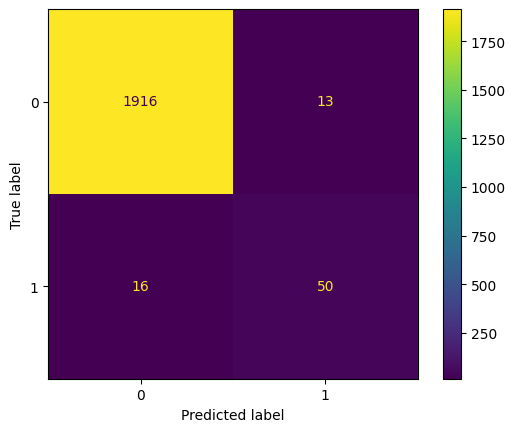

In [21]:
# Train-Test Split
A_train, A_test, b_train, b_test = train_test_split(
    A, b, test_size=0.2, random_state=42, stratify=b
)

# Class Weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(b),
    y=b
)
class_weights_dict = dict(zip(np.unique(b), class_weights))

# XGBoost Model
xgb_model = XGBClassifier(
    random_state=42,
    scale_pos_weight=class_weights[1] / class_weights[0],
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100
)

xgb_model.fit(A_train, b_train)

# Evaluate with Threshold Tuning
b_proba_xgb = xgb_model.predict_proba(A_test)[:, 1]
threshold_xgb = 0.9
b_pred_xgb = (b_proba_xgb >= threshold_xgb).astype(int)

cf_xgb = confusion_matrix(b_test, b_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(cf_xgb)
disp_xgb.plot()



In [22]:
tn_xgb, fp_xgb, fn_xgb, tp_xgb = cf_xgb.ravel()
accuracy_xgb = (tn_xgb + tp_xgb) / (tn_xgb + fp_xgb + fn_xgb + tp_xgb)
precision_xgb = tp_xgb / (tp_xgb + fp_xgb)
recall_xgb = tp_xgb / (tp_xgb + fn_xgb)
f1_score_xgb = 2 * (precision_xgb * recall_xgb) / (precision_xgb + recall_xgb)

print('\nXGBoost Metrics:')
print('Accuracy: ', accuracy_xgb)
print('Precision: ', precision_xgb)
print('Recall: ', recall_xgb)
print('F1 Score: ', f1_score_xgb)


XGBoost Metrics:
Accuracy:  0.9854636591478697
Precision:  0.7936507936507936
Recall:  0.7575757575757576
F1 Score:  0.7751937984496123
